In [1]:
import pickle
import platform
import os
if platform.system() == 'Darwin':
    DATA_PATH = "/Users/maltegenschow/Documents/Uni/Thesis/Data.nosync"
    ROOT_PATH = "/Users/maltegenschow/Documents/Uni/Thesis/Thesis"
elif platform.system() == 'Linux':
    DATA_PATH = "/pfs/work7/workspace/scratch/tu_zxmav84-thesis/Data.nosync"
    ROOT_PATH = "/pfs/work7/workspace/scratch/tu_zxmav84-thesis/Thesis"

current_wd = os.getcwd()

In [2]:
import torch
import os
from glob import glob
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

### Load embeddings

In [3]:
embeddings_path = f"{DATA_PATH}/Models/Assessor/DinoV2/Embeddings/hyperstyle_embeddings.pt"

In [4]:
embeddings_dict = torch.load(embeddings_path)
embeddings = torch.stack(list(embeddings_dict.values())).squeeze(1)

### Visualize Nearest Neighbors


In [5]:
def get_nearest_sku(sku):
    cos = torch.nn.CosineSimilarity(dim=1, eps=1e-6)
    target = embeddings_dict[sku]
    similarities = cos(target, embeddings)
    nearest_index = torch.argsort(similarities, descending=True)[1].item()
    nearest_sku = list(embeddings_dict.keys())[nearest_index]
    return nearest_sku

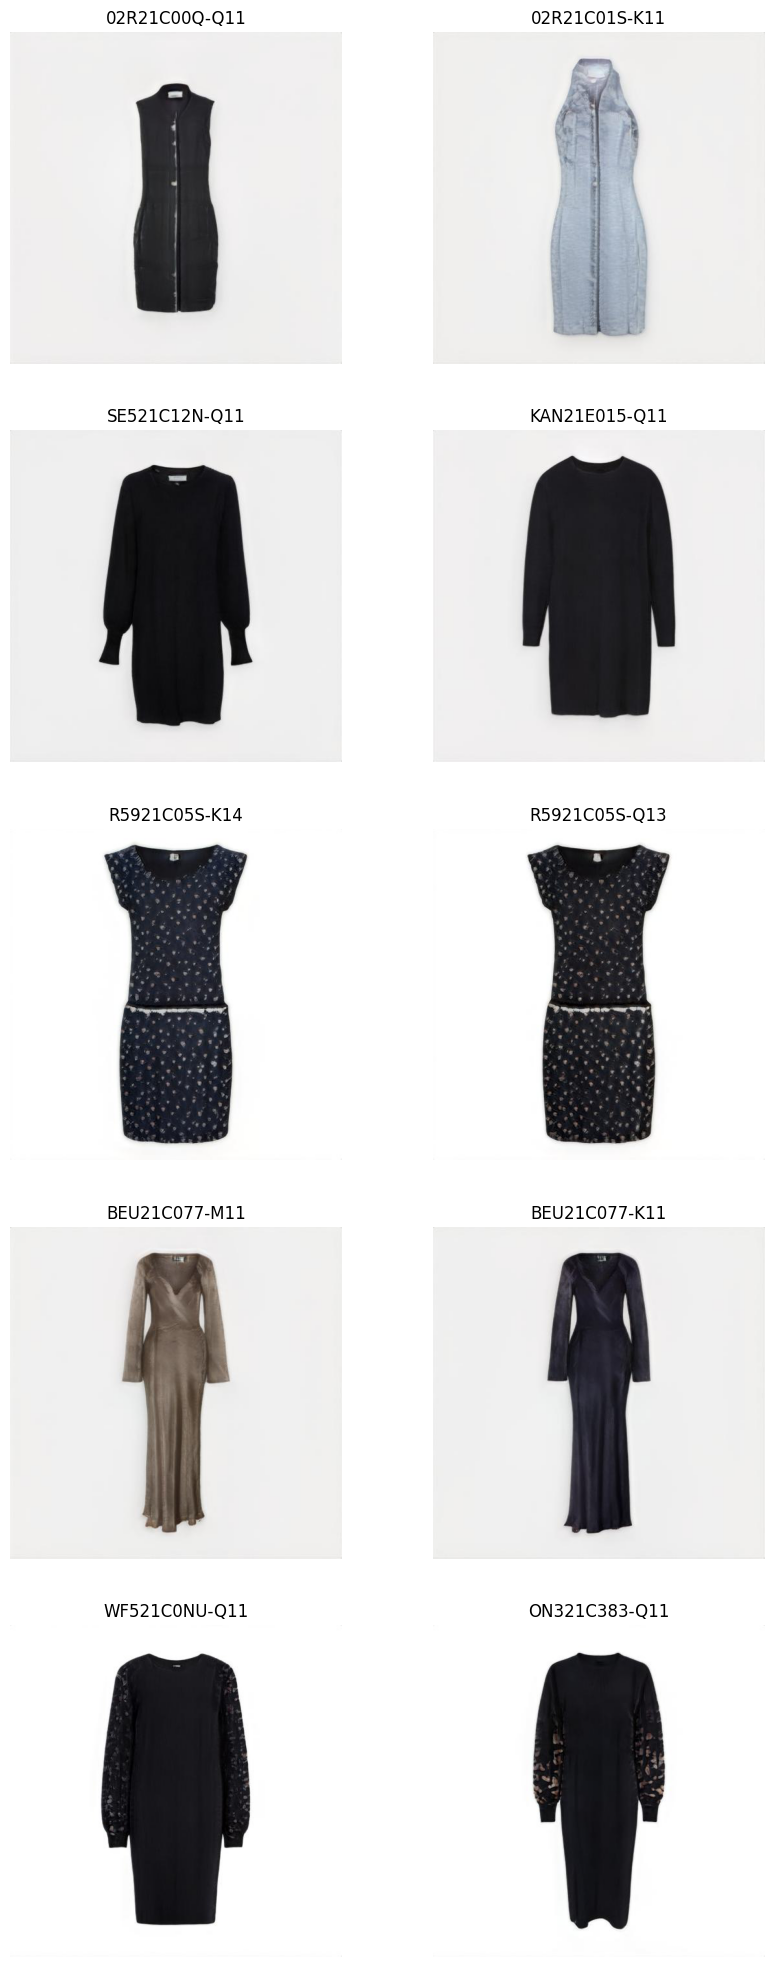

In [6]:
num_samples = 5
images_base_path = f"{DATA_PATH}/Generated_Images/hyperstyle/inference_results/4/"

sample = np.random.choice(list(embeddings_dict.keys()), num_samples)
neighbors = [get_nearest_sku(elem) for elem in sample]

fig, ax = plt.subplots(num_samples, 2, figsize = (10,num_samples*5))
for i in range(num_samples):
    ax[i, 0].imshow(Image.open(f'{images_base_path}{sample[i]}.jpg'))
    ax[i, 1].imshow(Image.open(f'{images_base_path}{neighbors[i]}.jpg'))

    ax[i, 0].set_title(sample[i])
    ax[i, 1].set_title(neighbors[i])

for axs in ax.flatten():
    axs.axis('off')

plt.show()